In [1]:
%pip uninstall -y scikit-learn keras tensorflow

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [2]:
%pip install scikeras==0.12.0
%pip install tensorflow==2.15.0
%pip install scikit-learn==1.3.1

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikeras
    Found existing installation: scikeras 0.13.0
    Uninstalling scikeras-0.13.0:
      Successfully uninstalled scikeras-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  At

  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [112]:
import urllib.request
import zipfile
import pickle
import io
import os

import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier

In [4]:
print(sklearn.__version__)
print(keras.__version__)
print(tensorflow.__version__)

1.3.1
2.15.0
2.15.0


In [6]:
# Download the zip file form github repository
zip_url = "https://raw.githubusercontent.com/Matiin-heidari/sample-class-predictor/main/input_data.zip"
zip_path, _ = urllib.request.urlretrieve(zip_url)
target_folder = "temp"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
  zip_ref.extractall(target_folder)

In [54]:
# Load the data
data_path = os.path.join(target_folder, "input_data.pkl")
with open(data_path, "rb") as f:
  data = pickle.load(f)

X = data["X"]
y = data["y"]

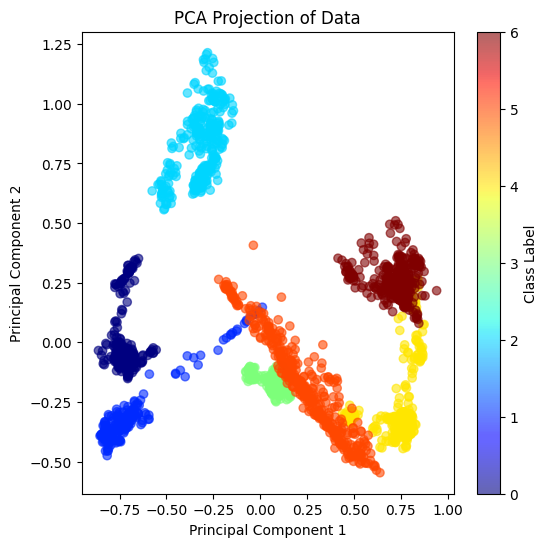

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert string labels to integers
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Now y is numeric

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Reduce to 2D

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap="jet", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Data")
plt.colorbar(label="Class Label")
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [75]:
# Min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# One-Hot Encoding for labels
encoder = OneHotEncoder(sparse_output=False)

In [76]:
# Preprocess Data
X_train_scaled = scaler.fit_transform(X_train)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

In [77]:
X_train_scaled[0]

array([0.71654618, 0.54876253, 0.61865585, 0.70494356, 0.69706775,
       0.50519292, 0.67484964, 0.6219459 , 0.69459065, 0.49954528,
       0.67495147, 0.63743825, 0.6858842 , 0.49247204, 0.67532953,
       0.55593649, 0.70930032, 0.49156649, 0.58413588, 0.73007094,
       0.71001986, 0.47923032, 0.58400119, 0.81134816, 0.69878875,
       0.46598603, 0.58391756, 0.79623769, 0.65278449, 0.45654899,
       0.88950422, 0.2284391 , 0.66423711, 0.39914622, 0.47448404,
       0.88762376, 0.69500454, 0.55324325, 0.69699176, 0.36330076,
       0.71522548, 0.54340706, 0.57760552, 0.26531045, 0.50371043,
       0.61166772, 0.96661069, 0.04686002, 0.70607892, 0.31362539,
       0.23424896, 0.91624903, 0.4646643 , 0.94511045, 0.96032028,
       0.03688365, 0.94983173, 0.9246562 , 0.1589035 , 0.96889028,
       0.38955654, 0.9058271 , 0.98191876, 0.04483186, 0.84010308,
       0.40527482, 0.24850736, 0.99088716, 0.40985654, 0.91482103,
       0.97951587, 0.10179692, 0.83012157, 0.31705644, 0.25276

In [78]:
y_train_encoded[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [82]:
def create_model(learning_rate=0, dropout_rate=0, nunits=0):
    model = Sequential()
    model.add(Dense(nunits, activation='relu', input_shape=(132,)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(nunits//2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(7, activation='softmax'))  # Output layer with 7 classes

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [83]:
# Wrap model for GridSearchCV
model = KerasClassifier(model=create_model, verbose=0, learning_rate=0, dropout_rate=0, nunits=0)

In [84]:
# Hyperparameter Grid Search
param_grid = {
    'learning_rate': [0.0005, 0.001],
    'dropout_rate': [0.2, 0.3],
    'nunits': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [5, 10, 15]
}


In [85]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_result = grid.fit(X_train_scaled, y_train_encoded)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [86]:
# Best Parameters
print(f"Best Parameters: {grid_result.best_params_}")

Best Parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 5, 'learning_rate': 0.0005}


In [117]:
final_model = Sequential()

final_model.add(Dense(128, activation='relu', input_shape=(132,), kernel_regularizer=l2(0.01)))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.2))

final_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.2))

final_model.add(Dense(7, activation='softmax'))

final_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [119]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

In [120]:
X_train_set, X_val_set, y_train_set, y_val_set = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42, shuffle=True)


In [121]:
final_model.fit(X_train_set, y_train_set, epochs=5, batch_size=16, validation_data=(X_val_set, y_val_set), callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 2s 5ms/step - loss: 2.4154 - accuracy: 0.8552 - val_loss: 2.6656 - val_accuracy: 0.7487
Epoch 2/5
95/95 [==============================] - 0s 3ms/step - loss: 1.5803 - accuracy: 0.9927 - val_loss: 1.8104 - val_accuracy: 0.9894
Epoch 3/5
95/95 [==============================] - 0s 3ms/step - loss: 1.3265 - accuracy: 0.9974 - val_loss: 1.3047 - val_accuracy: 1.0000
Epoch 4/5
95/95 [==============================] - 0s 3ms/step - loss: 1.1553 - accuracy: 0.9947 - val_loss: 1.0854 - val_accuracy: 1.0000
Epoch 5/5
95/95 [==============================] - 0s 3ms/step - loss: 1.0060 - accuracy: 0.9987 - val_loss: 0.9331 - val_accuracy: 1.0000


In [89]:
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test)

In [96]:
y_test_pred = final_model.predict(X_test_scaled)

26/26 [==============================] - 0s 1ms/step


In [102]:
# Convert probabilities to categorical indices
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Convert categorical indices to one-hot encoding
num_classes = y_test_pred.shape[1]  # Get number of classes
y_test_pred_one_hot = np.eye(num_classes)[y_test_pred_labels]

In [109]:
print("Accuracy score: ", accuracy_score(y_test_encoded, y_test_pred_one_hot))

Accuracy score:  1.0
